### Name : Priyashan BWS
### Index : 190476V

In [24]:
%matplotlib inline
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

## Question 01

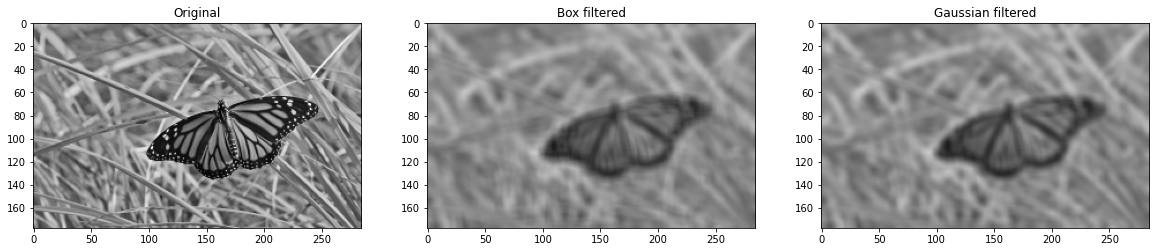

In [95]:
butterfly  = cv.imread("D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Exercise_03/butterfly.jpg",cv.IMREAD_REDUCED_GRAYSCALE_4)
assert butterfly is not None

kernel = np.ones((9,9),np.float32)/81
imgA = cv.filter2D(butterfly,-1,kernel)

imgB = cv.GaussianBlur(butterfly,(9,9),4)

fig, axes = plt.subplots(1,3,figsize=(20,20))
axes[0].imshow(butterfly,cmap='gray')
axes[0].set_title('Original')

axes[1].imshow(imgA_RGB)
axes[1].set_title('Box filtered')

axes[2].imshow(imgB_RGB)
axes[2].set_title('Gaussian filtered')
plt.show()

## Question 02

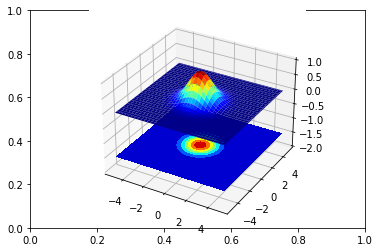

In [96]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots()
ax = fig.add_subplot(111,projection='3d')

step = 0.1
x = np.arange(-5, 5 + step, step)
y = np.arange(-5, 5 + step, step)
XX, YY = np.meshgrid(x,y)
sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))

surf = ax.plot_surface(XX,YY,g, cmap=cm.jet)

cset = ax.contourf(XX,YY,g,zdir='z',offset=np.min(g)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(g)-2,np.max(g))

plt.show()

## Question 03

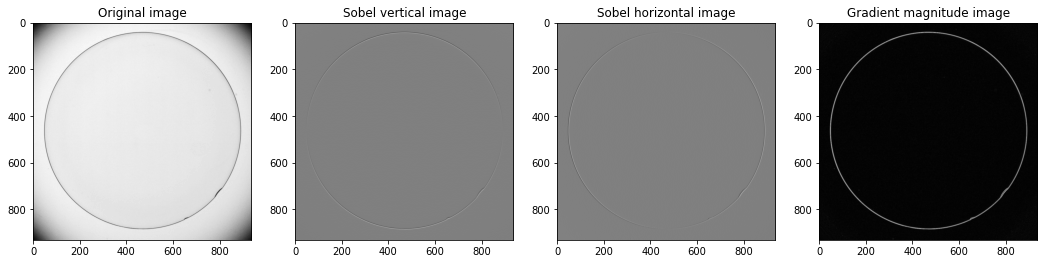

In [101]:
contact_lens = cv.imread("D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Exercise_03/contact_lens.tif",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert contact_lens is not None

sobel_v = np.array([(-1,-2,-1),(0,0,0,),(1,2,1)],dtype=np.float32)
sobel_h = np.array([(-1,0,1),(-2,0,2,),(-1,0,1)],dtype=np.float32)

imgA = cv.filter2D(contact_lens,-1,sobel_v)
imgB = cv.filter2D(contact_lens,-1,sobel_h)

grad_mag = np.sqrt(imgA**2 + imgB**2)

fig, axes = plt.subplots(1,4,figsize=(18,18))
axes[0].imshow(contact_lens,cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(imgA,cmap='gray',vmin=-1020, vmax=1020)
axes[1].set_title('Sobel vertical image')

axes[2].imshow(imgB,cmap='gray',vmin=-1020, vmax=1020)
axes[2].set_title('Sobel horizontal image')

axes[3].imshow(grad_mag,cmap='gray')
axes[3].set_title('Gradient magnitude image')

plt.show()

## Question 04

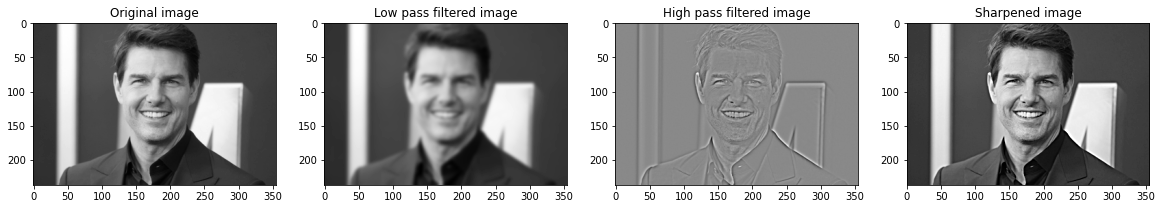

In [100]:
tom = cv.imread("D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Exercise_03/tom.jpg",cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
assert tom is not None

sigma = 2
kernel = cv.getGaussianKernel(15,sigma)

img_low  = cv.sepFilter2D(tom,-1,kernel,kernel)
img_high = tom - img_low
img_sharpened = cv.addWeighted(tom,1.0,img_high,1.0,0)

fig, axes = plt.subplots(1,4,figsize=(20,20))
axes[0].imshow(tom,cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(img_low,cmap='gray')
axes[1].set_title('Low pass filtered image')

axes[2].imshow(img_high,cmap='gray')
axes[2].set_title('High pass filtered image')

axes[3].imshow(img_sharpened,cmap='gray',vmin=0, vmax=255)
axes[3].set_title('Sharpened image')

plt.show()